In [1]:
import os
from scipy.io import wavfile

In [178]:
SINE_WAVE_PATH = os.path.abspath(
    "/Users/siddhantjagadish/Documents/DataProjects/vr_visualizer2/base_audio/sine_wave_sample.wav"
)
HOPKINS_PATH = os.path.abspath(
    "/Users/siddhantjagadish/Documents/DataProjects/vr_visualizer2/base_audio/jon_hopkins_sample.wav"
)
MEHLDAU_PATH = os.path.abspath(
    "/Users/siddhantjagadish/Documents/DataProjects/vr_visualizer2/base_audio/mehldau_john_boy.wav"
)
DODOS_PATH = os.path.abspath(
    "/Users/siddhantjagadish/Documents/DataProjects/vr_visualizer2/base_audio/dodos_ashley.wav"
)

In [212]:
?Audio

In [247]:
%matplotlib inline
import librosa
from librosa import display as librosa_display
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio


class SongAnalyzer(object):

    def __init__(self, path, offset=0.0, duration=None):
        self.path = path
        self.y, self.sr = librosa.load(path, offset=offset, duration=duration)

        self.mel_spectrogram = librosa.feature.melspectrogram(
            y=self.y,
            sr=self.sr,
            n_mels=128,
            n_fft=2048,
            fmax=8000,
        )
        self.mean_power = self.mel_spectrogram.mean(axis=0)
        self.mean_power_diff = np.diff(self.mean_power)
        self.norm_spectrogram = self.mel_spectrogram - self.mel_spectrogram.mean(axis=0)
        
        self.chromagram = librosa.feature.chroma_cqt(y=self.y, sr=self.sr)
        self.len_seconds = len(self.y) / self.sr
        
    @staticmethod
    def _display_gram(gram, y_axis, x_axis='time', title=''):
        plt.figure(figsize=(10, 4))
        S_dB = librosa.power_to_db(gram, ref=np.max)
        librosa_display.specshow(
            S_dB,
            x_axis=x_axis,
            y_axis=y_axis,
            sr=sr,
            fmax=8000,
        )
        plt.colorbar(format='%+2.0f dB')
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def display_mel_spectrogram(self):
        self._display_gram(self.mel_spectrogram, 'mel', title='Mel-Frequency Spectrogram')

    def display_chromagrame(self):
        self._display_gram(self.chromagram, 'cqt_note', title='Chroma CQT Spectrogram')

    def display_norm_spectrogram(self):
        self._display_gram(self.norm_spectrogram, 'mel', title='Normalized Mel-Frequency Spectrogram')
        
        
    def plot_mean_power(self):
        _x = np.linspace(0, self.len_seconds, len(self.mean_power))
        plt.plot(_x, self.mean_power)
        plt.xlabel("Seconds")
        plt.ylabel("Mean Power")
        plt.show()
        plt.close()
    
    def plot_power_diff(self):
        _x = np.linspace(0, self.len_seconds, len(self.mean_power_diff))
        plt.plot(_x, self.mean_power_diff)
        plt.xlabel("Seconds")
        plt.ylabel("Mean Power")
        plt.show()
        plt.close()

    def audio(self):
        return Audio(data=self.y, rate=self.sr)

In [248]:
sa = SongAnalyzer(HOPKINS_PATH)
sa.audio()

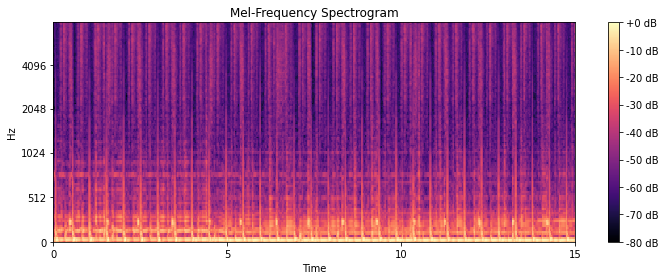

In [249]:
sa = SongAnalyzer(HOPKINS_PATH)
sa.display_mel_spectrogram()

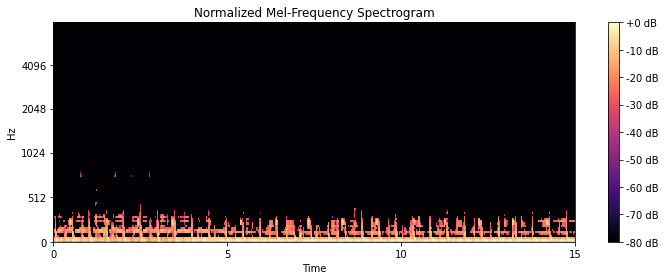

In [250]:
sa.display_norm_spectrogram()

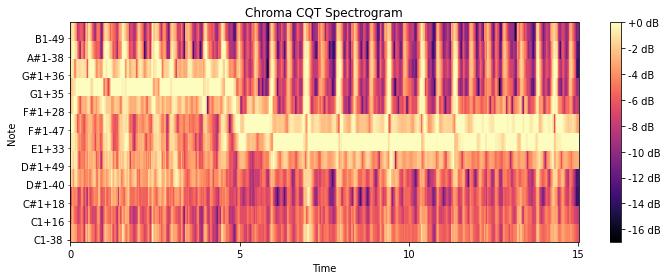

In [251]:
sa.display_chromagrame()

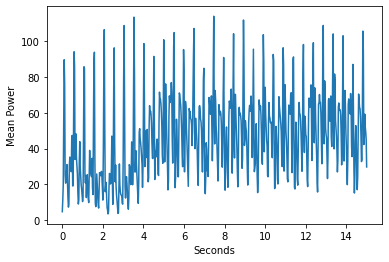

In [252]:
sa.plot_mean_power()

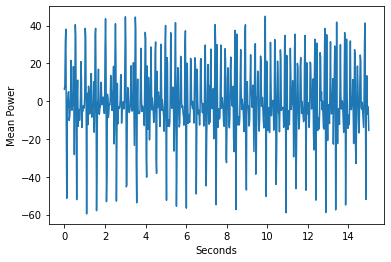

In [253]:
sa.plot_power_diff()

Now let's try with Mehldau...

In [254]:
sam = SongAnalyzer(MEHLDAU_PATH, offset=7., duration=15.)
sam.audio()

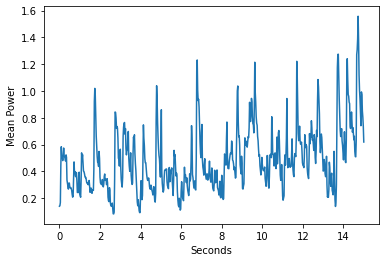

In [255]:
sam.plot_mean_power()

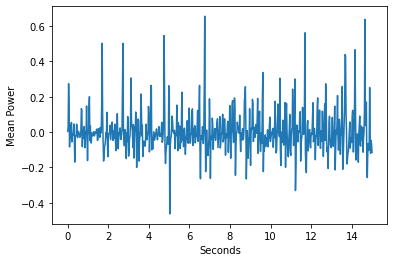

In [256]:
sam.plot_power_diff()

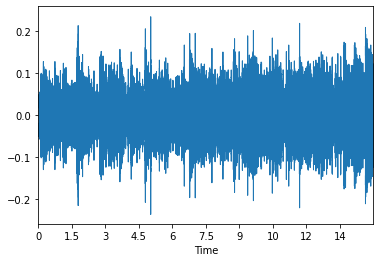

In [240]:
librosa_display.waveplot(sam.y, sr=sam.sr)

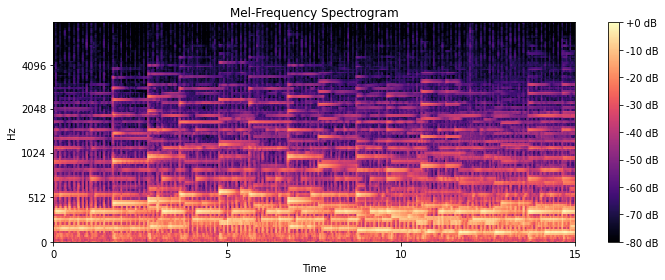

In [226]:
sam.display_mel_spectrogram()

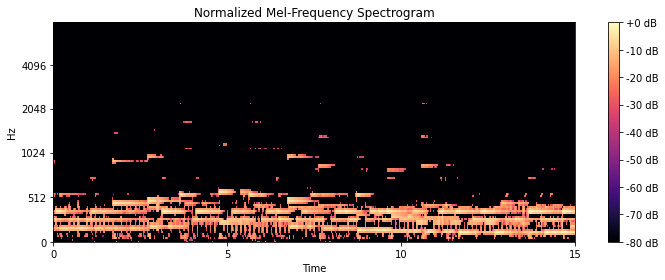

In [204]:
sam.display_norm_spectrogram()

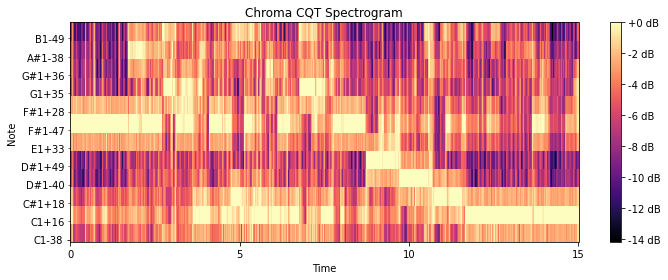

In [227]:
sam.display_chromagrame()

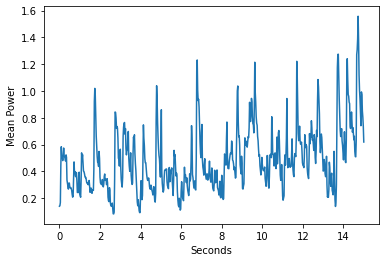

In [228]:
sam.plot_mean_power()

In [ ]:
sam.mel_spectrogram.

In [257]:
sad = SongAnalyzer(DODOS_PATH, offset=40., duration=6.)
sad.audio()

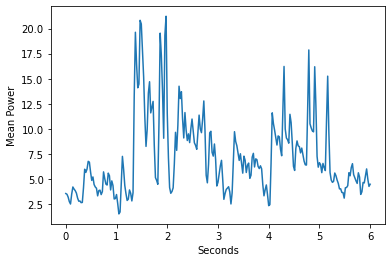

In [258]:
sad.plot_mean_power()

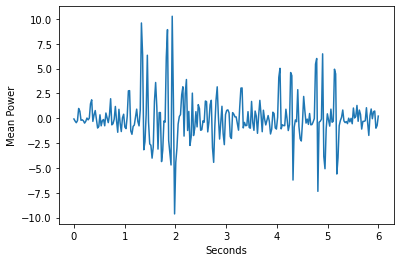

In [259]:
sad.plot_power_diff()

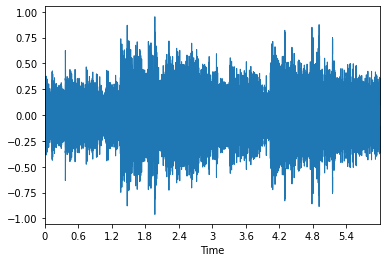

In [241]:
librosa_display.waveplot(sad.y, sad.sr)

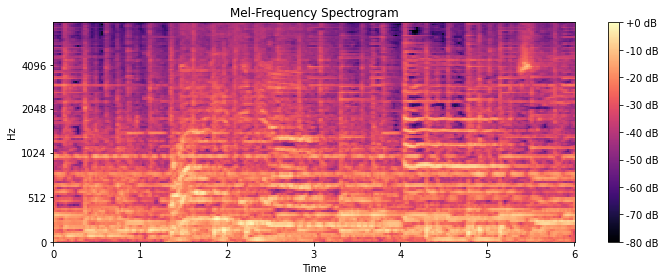

In [236]:
sad.display_mel_spectrogram()

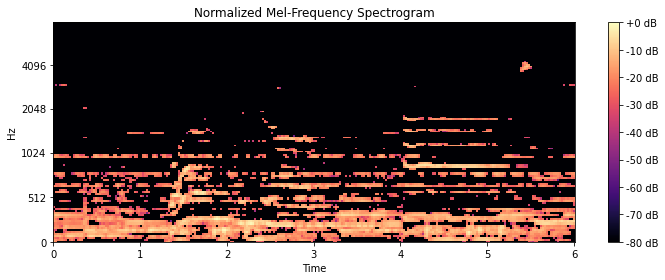

In [237]:
sad.display_norm_spectrogram()